# Convolution Tests

In [1]:
import numpy as np
from scipy.ndimage import convolve as convolve_img
from scipy.signal import convolve as convolve_sig
from scipy.signal import convolve2d as convolve2d_sig

import convolution

In [2]:
x = np.array([[1, 0, 0, 1, 1]])
convolution.convolve2d(x, x.transpose())

array([[1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1.]])

In [3]:
convolve2d_sig(x, x.transpose())

array([[1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1]])

In [13]:
X = np.array(
    [[1 , 2 , 3, 4, 5],
     [8 , 9 , 10, 4, 5],
     [15, 16, 17, 4, 5]]) 
K = np.array(
    [[0, -1, 0, 3],
     [-1, 4, -1, 3],
     [0 ,-1, 0, 3]])
convolution.convolve2d(X, K)

array([[  0.,  -1.,  -2.,   0.,   2.,   4.,  12.,  15.],
       [ -1.,  -6.,  -5.,  23.,  37.,  50.,  19.,  30.],
       [ -8.,   7.,   0.,  79.,  74.,  96.,  31.,  45.],
       [-15.,  36.,  23., 107.,  65.,  92.,  19.,  30.],
       [  0., -15., -16.,  28.,  44.,  46.,  12.,  15.]])

In [23]:
convolution.convolve2d(K, X)

array([[  0.,  -1.,  -2.,   0.,   2.,   4.,  12.,  15.],
       [ -1.,  -6.,  -5.,  23.,  37.,  50.,  19.,  30.],
       [ -8.,   7.,   0.,  79.,  74.,  96.,  31.,  45.],
       [-15.,  36.,  23., 107.,  65.,  92.,  19.,  30.],
       [  0., -15., -16.,  28.,  44.,  46.,  12.,  15.]])

In [24]:
convolve_img(K, X, mode="constant", cval=0)

array([[ -5,  23,  37,  50],
       [  0,  79,  74,  96],
       [ 23, 107,  65,  92]])

In [27]:
convolution.convolve2d(X, K, crop=(2, 3),image_mode= False, edge_mode="constant", edge_params=[0])

array([[ -5.,  23.,  37.,  50.],
       [  0.,  79.,  74.,  96.],
       [ 23., 107.,  65.,  92.]])

In [6]:
data = K
filter = np.flip(np.flip(X, axis=1), axis=0)
filter

array([[17, 16, 15],
       [10,  9,  8],
       [ 3,  2,  1]])

In [7]:
l, k = filter.shape
crop = (1,1)
er, ec = convolution.get_dim_ext((l, k), crop)
data_ext = convolution._expand_matrix(data, (er, ec), ["constant"]+[0])
n,m = data_ext.shape
result = np.zeros(shape = (n-l+1, m-k+1))

In [8]:
filter

array([[17, 16, 15],
       [10,  9,  8],
       [ 3,  2,  1]])

In [9]:
data

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [10]:
data_ext

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
res = []
for i, h_row in enumerate(filter):
    data_i = data_ext[i:n-l+i+1]
    #res.append(np.stack([np.convolve(r, h_row, mode="vaild") for r in data_i]))
    res.append([np.convolve(r, h_row, mode="vaild") for r in data_i])

In [12]:
data_e = np.array(
      [[ 0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
r = np.array([3,  2,  1])
for row in data_e:
    print("row:")
    print(row)
    print(np.convolve(row, h_row, mode="vaild"))


row:
[ 0.  0.  0. -1.  0.  0.  0.]
[ 0. -3. -2. -1.  0.]
row:
[ 0.  0. -1.  4. -1.  0.  0.]
[-3. 10.  4.  2. -1.]
row:
[ 0.  0.  0. -1.  0.  0.  0.]
[ 0. -3. -2. -1.  0.]
row:
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
row:
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [14]:
res

[[array([0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0.]),
  array([  0., -17., -16., -15.,   0.]),
  array([-17.,  52.,  32.,  44., -15.]),
  array([  0., -17., -16., -15.,   0.])],
 [array([0., 0., 0., 0., 0.]),
  array([  0., -10.,  -9.,  -8.,   0.]),
  array([-10.,  31.,  18.,  23.,  -8.]),
  array([  0., -10.,  -9.,  -8.,   0.]),
  array([0., 0., 0., 0., 0.])],
 [array([ 0., -3., -2., -1.,  0.]),
  array([-3., 10.,  4.,  2., -1.]),
  array([ 0., -3., -2., -1.,  0.]),
  array([0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0.])]]

In [15]:
np.convolve(r, h_row, mode="vaild")

array([10])

---

## with Image

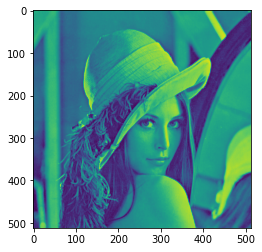

In [16]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage

im = pilimg.open("Lenna.png").convert('L')
pix = np.array(im)
plt.imshow(pix)


### Compare with Scipy routine

`convolve_img`: `scipy.ndimage.convolve`

`convolve(input, weight, ...)`

Note: this routine is implemneted for image processing, such that dimension of input and ouput always same.

$$n\times m , l \times k, (c_r, c_c)$$

if $l, k$ are odd

$$c_r = \frac{l+1}{2}, c_c = \frac{k+1}{2}$$

mode:

1. reflect
2. constant
3. nearest
4. mirror
5. wrap

In [17]:
filter_edge = (np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]))
filter_edge2 = (np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]))
filter_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
filter_blur = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])/9
filter_identity = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

In [18]:
filter_edge2.transpose()

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [19]:
def norm_image(p):
    p -= p.min()
    p *= (255/p.max())
    return np.asarray(p, dtype=np.uint8)

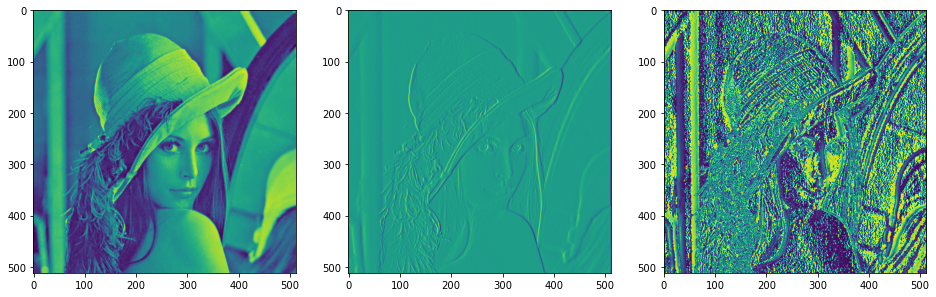

In [21]:
fil = filter_edge2
image_pix = pix
crop = (2, 2)
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(image_pix)
p_tem1_x = convolution.convolve2d(
     image_pix, fil  , crop, edge_mode="constant", edge_params=[0])
#p_tem1_x = norm_image(p_tem1_x)
#p_tem1_y = convolution.convolve2d(
#     image_pix, fil.transpose()  , crop, edge_mode="mirror", edge_params=[0])
#p_tem1_y = norm_image(p_tem1_y)
#p_tem1 = np.sqrt(np.power(p_tem1_x, 2) + np.power(p_tem1_y, 2))
ax2.imshow(p_tem1_x)

p_tem2 = convolve_img(image_pix, fil,mode="constant", cval=0)
ax3.imshow(p_tem2)

plt.show()

1dim array * 1dim array = matrix generation

In [6]:
x = np.array([[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]])
y = np.array(
    [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1], [0]])
d = convolution.convolve2d(x, y, (1,1), edge_mode="constant", edge_params=[0])
print(x.shape, y.shape, "->", d.shape)


(1, 11) (11, 1) -> (11, 11)


In [7]:
d

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

---

In [59]:
def get_matrix_system(data, filter):
    n,m = data.shape
    l, k= filter.shape

    if k != 2*m-1 or l != 2*n-1:
        raise ValueError("Invaild dimension: l, k must be 2n-1, 2m-1")
    
    rows = []
    for i in range(0, n):
        row_i = n-1-i
        row_f = 2*n-1-i

        for j in range(0, m):
            column_i = m-1 -j
            column_f = 2*m-1 -j

            #print(row_i, row_f)
            #print(column_i, column_f)

            t = filter[row_i : row_f, column_i:column_f]

            #print(t.shape)
            rows.append(t.flatten())

    #mat = np.vstack(rows)
    return rows, data.flatten()

In [58]:
K = np.array(
    [[-0, 0, 0, 0, 0],
     [-0, 4, 4, 4, 0],
     [-0, 4,  8, 4, 0],
     [-0, 4, -1, 4, 0],
     [-0, 0, 0, 0, 0]])
l, k = K.shape
n = 3
m = 3
X = np.arange(9).reshape(3,3)

---

In [176]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..\..")
from scipy.ndimage import convolve
from scipy.optimize import least_squares, nnls
import numpy as np
from matplotlib import pyplot as plt

from uilc import PositionArray
from uilc.utils import radiation
import convolution

In [184]:
s= 10
H = 0.2
W= 0.3
Wx = 0.2
Wy = 0.12


In [191]:
n=10
k = 2*n-1
d = lambda i, j, n: (n/2-i)**2 + (n/2-j)**2
dw = W/n

In [192]:
filter =np.fromfunction(lambda i, j: radiation.lambertian(0, (dw) *np.sqrt(d(i, j, k)), s, H), (k,k), dtype=float)
distribution = np.where(np.random.rand(*(k, k)) >= 0.98, 1, 0)
intensity = convolve(distribution, filter, mode='constant', cval=0.0)

In [193]:
filter.shape

(19, 19)

In [194]:
A = convolution.get_matrix_system(filter, (n, n))
if np.fabs(np.linalg.det(A)) < 1E-100000:
    pass
else: 
    dim_l = A.shape[0]
    const = np.ones(shape=(dim_l,))
    sol = nnls(A, const)[0]

In [195]:
sol2d = sol.reshape((n,n))
sol2d = sol2d/sol2d.max()
illumination = convolve(sol2d, filter, mode='constant', cval=0.0)

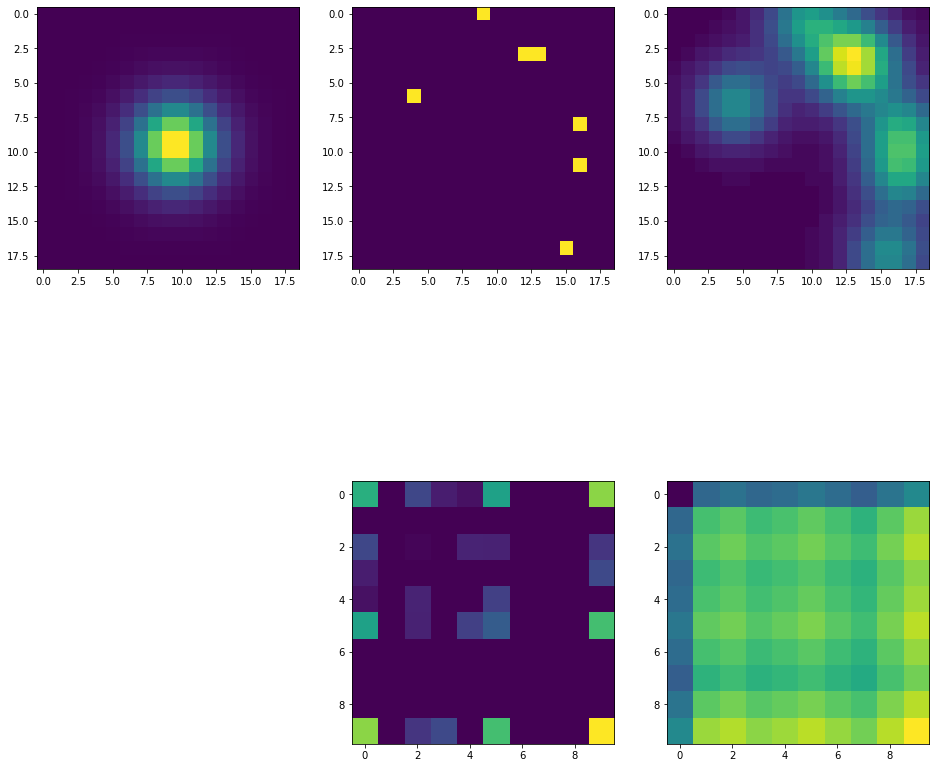

In [196]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 3, 1)# filter
ax2 = fig.add_subplot(2, 3, 2)# distribution
ax3 = fig.add_subplot(2, 3, 3)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.imshow(filter)
ax2.imshow(distribution)
ax3.imshow(intensity)
ax5.imshow(sol2d)
ax6.imshow(illumination)
plt.show()

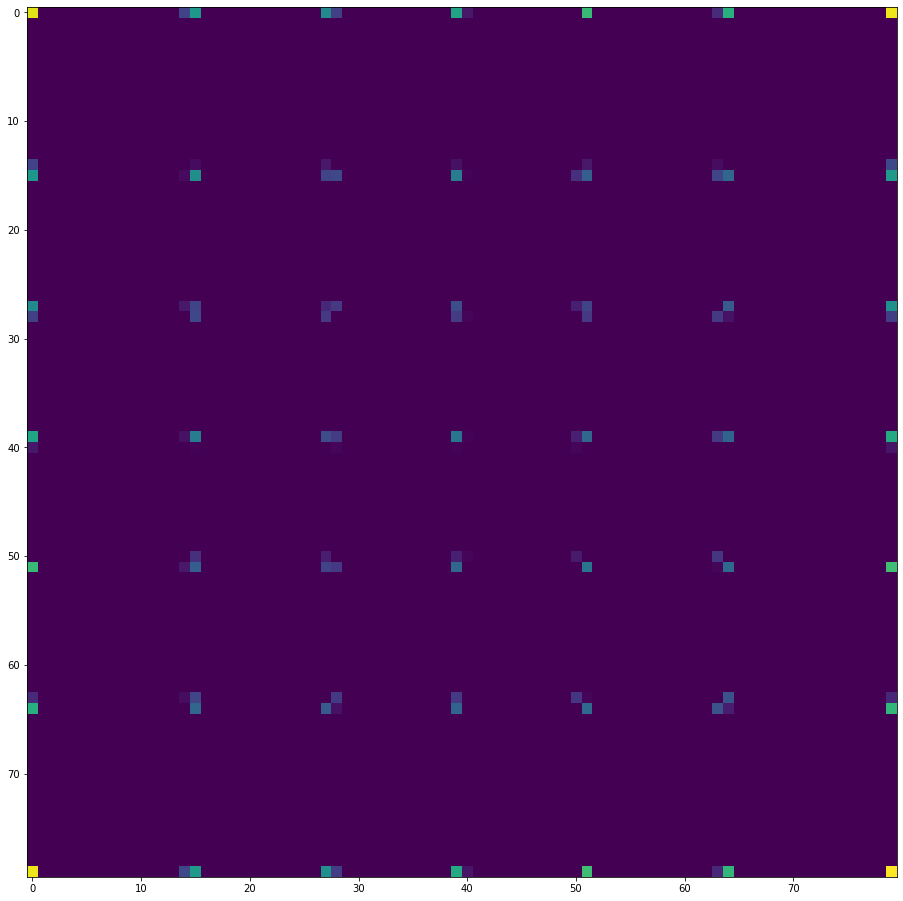

In [44]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot()
ax.imshow(sol2d)
plt.show()

In [9]:
illumination.min()

124.46303667842437

In [32]:
illumination = illumination/illumination.max()

In [33]:
illumination.min()

0.8281709758450234

In [34]:
illumination.std()

0.012010179030070674

In [1]:
import numpy as np

In [2]:
A = np.array([
    [3, 5, -1],
    [4, 0, 2],
    [-6, -3, 2]])
B = np.array([
    [2, -2, 3, 1],
    [5, 0, 7, 8],
    [9, -4,1, 1 ],
])

In [3]:
A.dot(B)

array([[ 22,  -2,  43,  42],
       [ 26, -16,  14,   6],
       [ -9,   4, -37, -28]])